## Training Models

In [1]:
import sys
assert sys.version_info >= (3,7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Linear Regression

### The Normal Equation

In [4]:
import numpy as np

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.randn(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

In [5]:
X[0:5]

array([[ 0.99342831],
       [-0.2765286 ],
       [ 1.29537708],
       [ 3.04605971],
       [-0.46830675]])

In [6]:
print(f"X_max: {X.max()} \nX_min: {X.min()}")

X_max: 3.7045563690178756 
X_min: -5.239490208179489


In [7]:
y[0:5]

array([[ 5.56491418],
       [ 2.74976887],
       [ 7.54341671],
       [12.33590187],
       [ 2.43379404]])

In [8]:
print(f"y_max: {y.max()} \ny_min: {y.min()}")

y_max: 15.361462794254878 
y_min: -11.441779825208446


<function matplotlib.pyplot.show(close=None, block=None)>

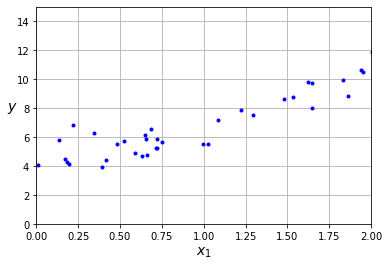

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

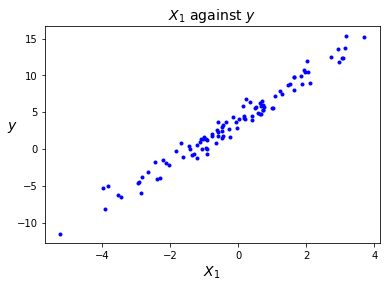

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(X,y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.title("$X_1$ against $y$")
plt.show

In [11]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
X_b[0:5]

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675]])

Compute θ using the Normal equation. Use the inv() function from
NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication

In [12]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.00742783],
       [2.92837142]])

The @ operator performs matrix multiplication. If A and B are
NumPy arrays, then A @ B is equivalent to np.matmul(A, B). Many
other libraries, like TensorFlow, PyTorch, and JAX, support the @
operator as well. However, you cannot use @ on pure Python arrays
(i.e., lists of lists)

In [13]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [14]:
# make predictions using θ

y_predict = X_new_b @ theta_best
y_predict

array([[4.00742783],
       [9.86417067]])

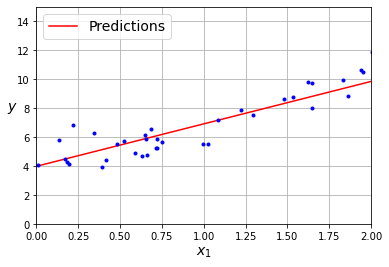

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

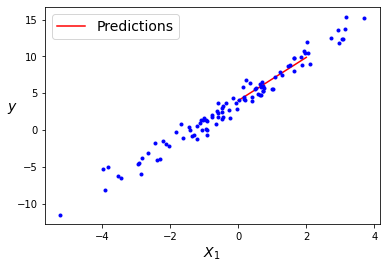

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.show

### Performing linear regression using Scikit-Learn

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

In [18]:
lin_reg.predict(X_new)

array([[4.00742783],
       [9.86417067]])

Scikit-Learn separates the bias term (intercept_) from the feature
weights (coef_).

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.00742783],
       [2.92837142]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [20]:
np.linalg.pinv(X_b) @ y

array([[4.00742783],
       [2.92837142]])

## Gradient Descent

### Batch Gradient Descent

In [21]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances
m

100

In [22]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [23]:
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [24]:
print(f"Gradients: {gradients} \n\ntheta{theta}")

Gradients: [[-3.84046239e-15]
 [-1.75130737e-15]] 

theta[[4.00742783]
 [2.92837142]]


C:\Users\user\AppData\Local\Temp/ipykernel_8416/3556404154.py:14: RuntimeWarning: overflow encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
C:\Users\user\AppData\Local\Temp/ipykernel_8416/3556404154.py:14: RuntimeWarning: invalid value encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)


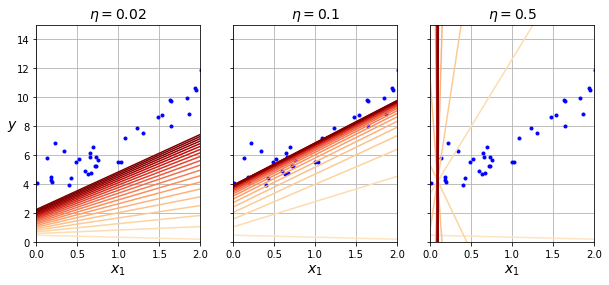

In [25]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

## Stochastic Gradient Descent

In [26]:
theta_path_sgd = []  # – we need to store the path of theta in the
                     #   parameter space to plot the next figure

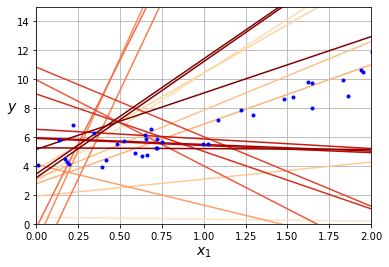

In [27]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  
for epoch in range(n_epochs):
    for iteration in range(m):

        # – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # – to generate the figure


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [28]:
theta

array([[4.04913598],
       [2.93329854]])

To perform linear regression using stochastic GD with Scikit-Learn, you can use
the SGDRegressor class, which defaults to optimizing the MSE cost function. The
following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by
less than 10–5 (tol) during 100 epochs (n_iter_no_change). It starts with a learning
rate of 0.01 (eta0), using the default learning schedule (different from the one we
used). Lastly, it does not use any regularization (penalty=None)

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0080759]), array([2.9297113]))

## Mini-batch Gradient Descent

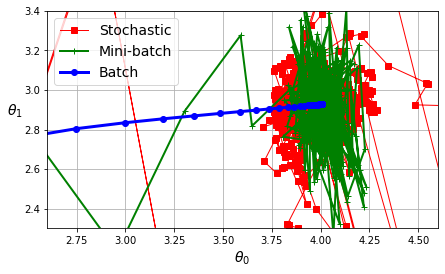

In [31]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()

plt.show()